In [1]:
import pandas as pd

In [2]:
data = pd.read_csv('loan.csv')

##### Baixar o arquivo loan.csv dos arquivos da disciplina e construir um modelo para predizer a variável Loan_Status

In [3]:
data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [4]:
# Mostrando detalhes de cada feature
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [5]:
# Linhas x Colunas
data.shape

(614, 13)

In [6]:
# Mostrando dados únicos para axis=0, ou seja, colunas
data.nunique(axis=0)

Loan_ID              614
Gender                 2
Married                2
Dependents             4
Education              2
Self_Employed          2
ApplicantIncome      505
CoapplicantIncome    287
LoanAmount           203
Loan_Amount_Term      10
Credit_History         2
Property_Area          3
Loan_Status            2
dtype: int64

In [7]:
# Mostrando somatório de NA que existem
data.isna().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [8]:
import seaborn as sns

C:\Users\rober\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


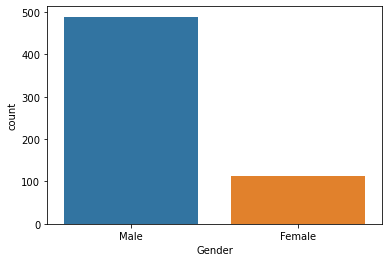

In [9]:
# Plotando imagem paga coluna 'Gender'
fig = sns.countplot(data.Gender)

In [10]:
# X (features) serão todas as colunas menos 'Loan_Status','Loan_ID'
X = data.drop(columns=['Loan_Status','Loan_ID'])
# y (target) será a coluna 'Loan_Status'
y = data['Loan_Status']

In [11]:
# Teste de auto-complete
#X = X.

In [12]:
X['Gender'].mode()

0    Male
dtype: object

In [13]:
X['Gender'].value_counts()

Male      489
Female    112
Name: Gender, dtype: int64

In [14]:
X.isna().sum() # Alguns são 0,00...

Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
dtype: int64

In [15]:
X.shape[0]

614

In [16]:
# X.shape[0] -> número de linhas
X.isna().sum()/X.shape[0]

Gender               0.021173
Married              0.004886
Dependents           0.024430
Education            0.000000
Self_Employed        0.052117
ApplicantIncome      0.000000
CoapplicantIncome    0.000000
LoanAmount           0.035831
Loan_Amount_Term     0.022801
Credit_History       0.081433
Property_Area        0.000000
dtype: float64

In [17]:
X['Married'].value_counts()

Yes    398
No     213
Name: Married, dtype: int64

In [18]:
# Preenchendo todas as colunas com valores vazios
X = X.fillna({'Gender':'NA','Married':'No','Dependents':'0','Self_Employed':'No',
             'LoanAmount':X['LoanAmount'].mean(),'Loan_Amount_Term':X['Loan_Amount_Term'].mean(),
             'Credit_History':0.0})

In [19]:
# Tratando colunas do tipo object com o get_dummies
X = pd.get_dummies(X,columns=['Gender','Married','Dependents','Education','Self_Employed','Property_Area'])

In [20]:
X

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Gender_Female,Gender_Male,Gender_NA,Married_No,Married_Yes,...,Dependents_1,Dependents_2,Dependents_3+,Education_Graduate,Education_Not Graduate,Self_Employed_No,Self_Employed_Yes,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban
0,5849,0.0,146.412162,360.0,1.0,0,1,0,1,0,...,0,0,0,1,0,1,0,0,0,1
1,4583,1508.0,128.000000,360.0,1.0,0,1,0,0,1,...,1,0,0,1,0,1,0,1,0,0
2,3000,0.0,66.000000,360.0,1.0,0,1,0,0,1,...,0,0,0,1,0,0,1,0,0,1
3,2583,2358.0,120.000000,360.0,1.0,0,1,0,0,1,...,0,0,0,0,1,1,0,0,0,1
4,6000,0.0,141.000000,360.0,1.0,0,1,0,1,0,...,0,0,0,1,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,2900,0.0,71.000000,360.0,1.0,1,0,0,1,0,...,0,0,0,1,0,1,0,1,0,0
610,4106,0.0,40.000000,180.0,1.0,0,1,0,0,1,...,0,0,1,1,0,1,0,1,0,0
611,8072,240.0,253.000000,360.0,1.0,0,1,0,0,1,...,1,0,0,1,0,1,0,0,0,1
612,7583,0.0,187.000000,360.0,1.0,0,1,0,0,1,...,0,1,0,1,0,1,0,0,0,1


In [21]:
# Novo número de colunas
X.shape[1]

21

## Scikit Learn

Python Machine Learning Library
- from sklearn.model_selection import train_test_split
- from sklearn.tree import DecisionTreeClassifier
- from sklearn.neighbors import KNeighborsClassifier

In [22]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

In [23]:
# SEparando em variáveis de treino e teste
X_train, X_test, y_train, y_test = train_test_split(X,y,train_size=0.8,stratify=y)

In [24]:
# Metricas de distancia
def euclidiana(a,b):
    soma = 0
    for i,j in zip(a,b):
        soma = soma + (i-j)**2
    return soma**0.5

def manhattan(a,b):
    soma = 0
    for i,j in zip(a,b):
        soma = soma + ((i-j)**2)**0.5
    return soma

In [25]:
# Normalizando os dados
from sklearn.preprocessing import MinMaxScaler, StandardScaler
mm = MinMaxScaler()
X_train_sc = mm.fit_transform(X_train)
# evitando o data leak
X_test_sc = mm.transform(X_test)

In [26]:
# minmax scaler
# comprime os dados em uma escala entre 0 e 1
# (valor - min) / (maximo - minimo)
lista = [1,3,7,3,5,2,8,6,3,9]
lista_treino = lista[:8]
lista_teste = lista[8:]
menor = min(lista_treino)
maior = max(lista_treino)
lista_treino_normalizada = [(x - menor)/(maior-menor) for x in lista_treino]
lista_teste_normalizada = [(x - menor)/(maior-menor) for x in lista_teste]
print(lista_teste_normalizada[:8])
print(lista_teste_normalizada[8:])
print(lista_treino_normalizada)
print(lista_teste_normalizada)

[0.2857142857142857, 1.1428571428571428]
[]
[0.0, 0.2857142857142857, 0.8571428571428571, 0.2857142857142857, 0.5714285714285714, 0.14285714285714285, 1.0, 0.7142857142857143]
[0.2857142857142857, 1.1428571428571428]


## Classificador K-NN

Para um novo dado, verifica-se quais dados do conjunto de treinamento são mais semelhantes
- Atributos (X)

A classe escolhida é a classe da maioria dos dados mais próximos

### Classificação
- Armazena n exemplos da cada classe (conjuntos de treinamento)
- Calcula a distância do novo ponto para todos os n exemplos de cada classe
- Verifica quais são os k pontos mais próximos 
- Verifica a class destes k pontos
- A classe do novo dado será igual a classe da maioria

In [27]:
for k in range(1,21): 
    knn = KNeighborsClassifier(n_neighbors=k,)
    knn.fit(X_train,y_train)
    print(f'Vizinhos {k}:{knn.score(X_test,y_test)}')

Vizinhos 1:0.5365853658536586
Vizinhos 2:0.5040650406504065
Vizinhos 3:0.6422764227642277
Vizinhos 4:0.5772357723577236
Vizinhos 5:0.6422764227642277
Vizinhos 6:0.5609756097560976
Vizinhos 7:0.6666666666666666
Vizinhos 8:0.6341463414634146
Vizinhos 9:0.6747967479674797
Vizinhos 10:0.6504065040650406
Vizinhos 11:0.6991869918699187
Vizinhos 12:0.6747967479674797
Vizinhos 13:0.7073170731707317
Vizinhos 14:0.6910569105691057
Vizinhos 15:0.6991869918699187
Vizinhos 16:0.6829268292682927
Vizinhos 17:0.6991869918699187
Vizinhos 18:0.6910569105691057
Vizinhos 19:0.6910569105691057
Vizinhos 20:0.6910569105691057


In [30]:
vizinhos = []

for k in range(1,21):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train_sc,y_train)
    vizinhos.append(knn)
    print(f'Vizinhos {k}:{knn.score(X_test_sc,y_test)}')

Vizinhos 1:0.7398373983739838
Vizinhos 2:0.6504065040650406
Vizinhos 3:0.6504065040650406
Vizinhos 4:0.7073170731707317
Vizinhos 5:0.6747967479674797
Vizinhos 6:0.6910569105691057
Vizinhos 7:0.6910569105691057
Vizinhos 8:0.6747967479674797
Vizinhos 9:0.7235772357723578
Vizinhos 10:0.7073170731707317
Vizinhos 11:0.7317073170731707
Vizinhos 12:0.7235772357723578
Vizinhos 13:0.7235772357723578
Vizinhos 14:0.7073170731707317
Vizinhos 15:0.7398373983739838
Vizinhos 16:0.7479674796747967
Vizinhos 17:0.7235772357723578
Vizinhos 18:0.7235772357723578
Vizinhos 19:0.7235772357723578
Vizinhos 20:0.7317073170731707
